<a href="https://colab.research.google.com/github/bethCoderNewbie/Netflix-Employee-Metrics-Dashboard/blob/main/Netflix_Dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-5-642aafc16512>:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


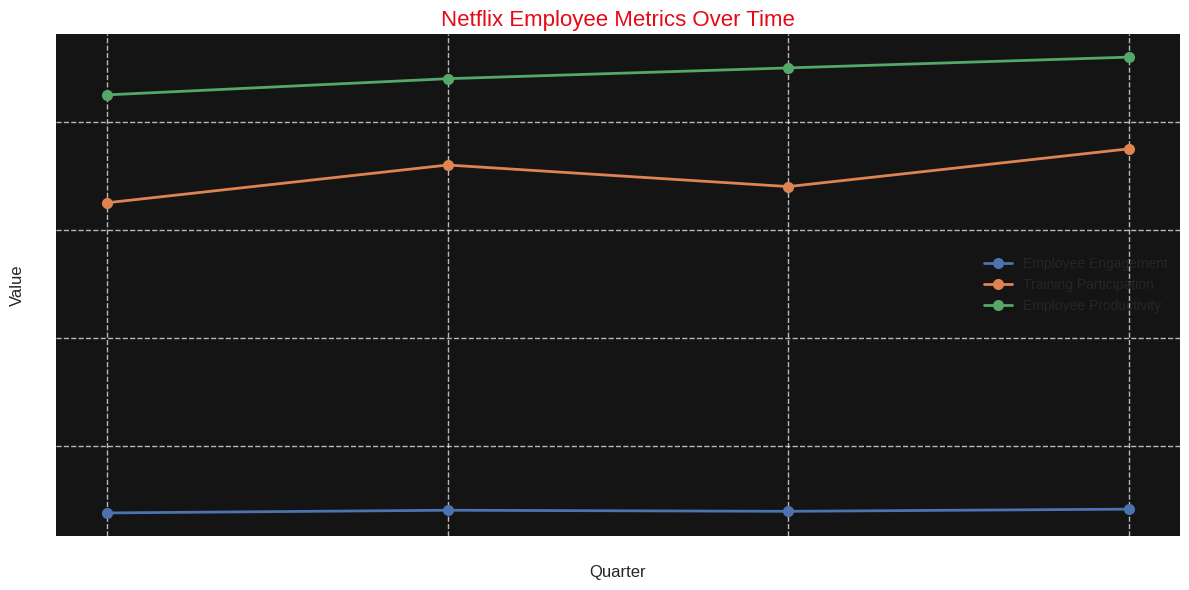

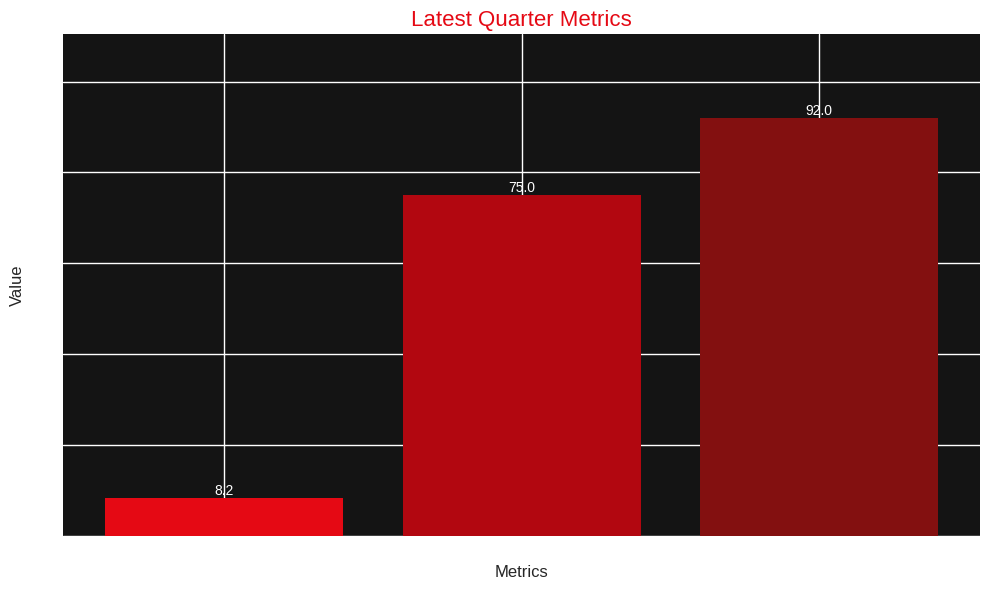

In [5]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

# Create sample data
data = pd.DataFrame({
    'Quarter': ['Q1', 'Q2', 'Q3', 'Q4'],
    'Employee Engagement': [7.5, 8.0, 7.8, 8.2],
    'Training Participation': [65, 72, 68, 75],
    'Employee Productivity': [85, 88, 90, 92]
})

# Set style for plots
plt.style.use('seaborn')
sns.set_palette("deep")

# Create a function to display metric cards
def display_metric_card(title, value, previous):
    card_html = f"""
    <div style="background-color: #141414; color: white; padding: 10px; margin: 5px; border: 1px solid #E50914; border-radius: 5px; width: 200px; display: inline-block;">
        <h3 style="color: #E50914; margin: 0;">{title}</h3>
        <p style="font-size: 24px; margin: 10px 0;">{value}</p>
        <p style="font-size: 12px; margin: 0;">Previous: {previous}</p>
    </div>
    """
    display(HTML(card_html))

# Display metric cards
latest = data.iloc[-1]
previous = data.iloc[-2]

display_metric_card("Employee Engagement", f"{latest['Employee Engagement']:.1f}", f"{previous['Employee Engagement']:.1f}")
display_metric_card("Training Participation", f"{latest['Training Participation']}%", f"{previous['Training Participation']}%")
display_metric_card("Employee Productivity", f"{latest['Employee Productivity']}%", f"{previous['Employee Productivity']}%")

# Create line plot
plt.figure(figsize=(12, 6))
for column in data.columns[1:]:
    plt.plot(data['Quarter'], data[column], marker='o', linewidth=2, markersize=8, label=column)

plt.title("Netflix Employee Metrics Over Time", fontsize=16, color='#E50914')
plt.xlabel("Quarter", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().set_facecolor('#141414')
plt.gca().spines['bottom'].set_color('white')
plt.gca().spines['left'].set_color('white')
plt.gca().tick_params(colors='white')
plt.setp(plt.gca().get_xticklabels(), color='white')
plt.setp(plt.gca().get_yticklabels(), color='white')

plt.tight_layout()
plt.show()

# Create bar plot for the latest quarter
latest_data = data.iloc[-1]
metrics = latest_data.index[1:]
values = latest_data.values[1:]

plt.figure(figsize=(10, 6))
bars = plt.bar(metrics, values, color=['#E50914', '#B20710', '#831010'])

plt.title("Latest Quarter Metrics", fontsize=16, color='#E50914')
plt.xlabel("Metrics", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.ylim(0, max(values) * 1.2)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}',
             ha='center', va='bottom', color='white')

plt.gca().set_facecolor('#141414')
plt.gca().spines['bottom'].set_color('white')
plt.gca().spines['left'].set_color('white')
plt.gca().tick_params(colors='white')
plt.setp(plt.gca().get_xticklabels(), color='white')
plt.setp(plt.gca().get_yticklabels(), color='white')

plt.tight_layout()
plt.show()